<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship/blob/main/0704_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 결측값 처리 실습
### 1. 결측값 확인
### 1) 필요 라이브러리 import

In [3]:
import pandas as pd                 # pandas package
import numpy as np                  # numpy package : np.nan 이용 결측값 생성
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
import seaborn as sns               # seaborn 시각화 패키지

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

from sklearn.impute import SimpleImputer       # sklearn의 열의 평균이나 중앙값, 최빈값으로 대체하게 해주는 클래스
from sklearn import linear_model               # sklearn의 선형회귀 모델

### 2) 결측값 데이터 생성

In [5]:
# 실습 데이터 생성
temp_dict = {'A열' : [np.nan, 4, 6, 5, 5, np.nan],
             'B열' : ['a', 'a', np.nan, 'b', 'b', 'b'],
             'C열' : [np.nan, 3.5, -1.5, np.nan, 5.5, np.nan],
             'D열' : [1, 0, 1, 0, 1, 1]}

missing_data = pd.DataFrame(temp_dict)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


### 3) 결측값 데이터 확인
#### - info() : 데이터에 대한 전반적인 정보 확인(행과 열의 크기, 컬럼명, 컬럼을 구성하는 데이터 유형, 결측값 등)
#### - 데이터 프레임 전체의 결측값 확인 : df.isnull(), isnull(df), df.notnull(), notnull(df)

In [6]:
# info() 데이터 프레임 정보 확인 index : 인덱스 범위, count 값으로 결측값 유무 확인
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [7]:
# isnull, isnull(df) 함수 이용, 결측값 확인
missing_data.isnull()       # true면 결측값, false면 결측값 아님

,A열,B열,C열,D열
0,True,False,True,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
5,True,False,True,False


In [8]:
# 결측값 갯수 확인
missing_data.isnull().sum()

A열    2
B열    1
C열    3
D열    0
dtype: int64

In [9]:
# 속성별 결측값 갯수 확인 'A열'의 결측값 갯수 확인
print(missing_data['A열'].isnull().sum())
print(missing_data['B열'].isnull().sum())
print(missing_data['C열'].isnull().sum())
print(missing_data['D열'].isnull().sum())

2
1
3
0


### 4) 결측값 시각화
#### - matplotlib : 파이썬에서 데이터를 차트나 플롯(Plot)으로 그려주는 시각화 패키지
#### - seaborn : Matplotlib을 기반, 색상 테마와 통계용 차트 등의 기능을 추가한 시각회 패키지

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)


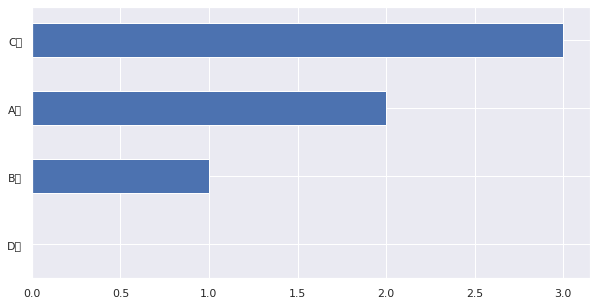

In [10]:
# 결측값 시각화 : 결측값이 많은 속성 순으로 정렬
missing_data.isnull().sum().sort_values().plot.barh(figsize = (10,5))

### 2. 결측값 처리 - 삭제법(Deleting)
#### - 삭제법 : 결측값이 있는 행과 열 자체를 지워버리는 방법
#### - 결측값이 80%에 가까운 경우 그 변수 자체를 제거하는 방식
#### - 결측값을 지우면서 데이터 자체의 편향(bias)이 생길 수 있음
#### - dropna() : column내에 결측값이 있으면 삭제하는 함수

In [11]:
# 결측값이 들어가 있는 행 제거, 결측값이 하나만 있어도 삭제
missing_data.dropna(axis = 0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [12]:
# 결측값이 들어가 있는 열 제거, 결측값이 하나만 있어도 삭제
missing_data.dropna(axis = 1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [13]:
# thresh 파라미터 이용, 결측값의 갯수가 n개 미만 존재하는 경우 결측값 삭제
missing_data.dropna(thresh = 5, axis = 1)       # 결측값 제외 후 5개 미만인 열은 A, C열

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


In [15]:
# 특정 열을 대상으로 결측값이 존재하는 raw 제거
missing_data[missing_data['B열'].notnull()]

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


### 3. 결측값 처리 - 대처법(Imputation)
#### - fillna() : DataFrame에서 결측값을 원하는 값으로 변경하는 함수
#### - SimpleImputer() : sklearn의 열의 평균이나 중앙값, 최빈으로 대체하게 해 주는 클래스
#### - linear_model() : sklearn의 선형 회귀법을 이용하여 값을 대체(조건부 평균 대치법)

In [16]:
# 결측값 확인
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


### 1) fillna() : DataFrame에서 결측값을 원하는 값으로 변경하는 함수
#### - 특정 값으로 채우기(특정값, 평균 : mean, 최소값 : min 등)
#### - method : ffill(이전 값으로 채우기), bfill(이 후 값으로 채우기)

In [17]:
# 특정값으로 채우기: 0으로 채우기
missing_data["A열"].fillna(0)
# missing_data["A열"] = missing_data["A열"].fillna(0)       # 해당 라인 주석 풀면 값이 업데이트 됨

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [18]:
# 이전 값으로 채우기
missing_data["B열"].fillna(method = "ffill")

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [19]:
# 이후 값으로 채우기
missing_data["C열"].fillna(method = "bfill").head

<bound method NDFrame.head of 0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64>

In [20]:
# 결측값을 속성별 평균으로 대체하기
missing_data.fillna(missing_data.mean())
# missing_data.where(pd.notnull(missing_data), missing_data.min(), axis = 'columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


### 2) SimpleImputer() : sklearn의 열의 평균이나 중앙값, 최빈으로 대체하게 해주는 클래스
#### - strategy (most_frequent : 최빈값, mean : 평균값, median : 중앙값)

In [21]:
# 데이터 준비, 앞서 확인한 missing_data를 copy해서 활용
df = missing_data

# SimpleImputer 생성
imputer = SimpleImputer(strategy="most_frequent")       # 최빈값으로 대체
# strategy (most_frequent : 최빈값, mean : 평균값, median : 중앙값)

In [22]:
# A열의 최빈값을 결측값에 대체
df["A열"] = imputer.fit_transform(missing_data[["A열"]])

In [23]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [24]:
# 나머지 열의 결측값을 최빈값으로 대체
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [25]:
df

,A열,B열,C열,D열
0,5.0,a,-1.5,1
1,4.0,a,3.5,0
2,6.0,b,-1.5,1
3,5.0,b,-1.5,0
4,5.0,b,5.5,1
5,5.0,b,-1.5,1


### 3) linear_model() : sklearn의 선형 회귀법을 이용하여 값을 대체(조건부 평균 대치법)

In [26]:
# 실습 데이터 로드
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                   header = None,
                   names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])

# 20개의 테스트 데이터만 저장
df_missing = data.copy()[:20]

In [27]:
# 결측값 데이터 생성
df_missing.loc[0:4, 'whole_weight'] = np.nan

In [28]:
df_missing.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [29]:
# 학습 데이터 생성: X, Y에 결측값 삭제
X = df_missing.dropna(axis=0)[['diameter', 'height', 'shell_weight']]
y = df_missing.dropna(axis=0)['whole_weight']

In [30]:
X.head()

,diameter,height,shell_weight
5,0.300,0.095,0.120
6,0.415,0.150,0.330
7,0.425,0.125,0.260
8,0.370,0.125,0.165
9,0.440,0.150,0.320


In [31]:
y.head()

5    0.3515
6    0.7775
7    0.7680
8    0.5095
9    0.8945
Name: whole_weight, dtype: float64

In [32]:
# 선형회귀 모델 생성
lin_reg = linear_model.LinearRegression()

# 선형회귀 모형 구성
lin_reg_model = lin_reg.fit(X, y)

# 선형회귀 모델로 'whole_weight' 추정값 계산
y_pred = lin_reg_model.predict(df_missing.loc[:, ['diameter', 'height', 'shell_weight']])

y_pred

array([0.49254286, 0.18873668, 0.68747377, 0.50646044, 0.14810905,
       0.31971105, 0.81030386, 0.7493438 , 0.52804836, 0.85355676,
       0.6024405 , 0.44821428, 0.5794571 , 0.65250514, 0.51008432,
       0.67516872, 0.26825093, 0.41836777, 0.2830785 , 0.35896888])

In [33]:
# 선형회귀 모델의 예측값을 결측값에 대체

# fillna() 함수 이용
# flatten(): numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수
df_missing['whole_weight'].fillna(pd.Series(y_pred.flatten()), inplace=True)

# 결과 확인
df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.492543,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.188737,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.687474,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.506460,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.148109,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19
